# ROI Prediction Model Training - Random Forest Regressor

This notebook trains a Random Forest Regressor model to predict ROI based on real estate property features and smart home features.

## 1. Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PowerTransformer # For data transformation
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

In [4]:
import sklearn, joblib, numpy, pandas
print(sklearn.__version__)   # should show 1.7.1 (or whatever pip installed)

1.2.2


## 2. Load and Explore the Dataset

In [6]:
# Load the dataset
df = pd.read_csv("../data/real_estate_data_template.csv")

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (300, 24)

First few rows:


,property_id,location_suburb,property_type,stand_size_sqm,building_size_sqm,bedrooms,bathrooms,sale_price_usd,rental_income_usd_monthly (est),has_solar,...,has_ev_charging,annual_rental_income_usd,ROI_percentage,annual_property_tax_usd,annual_maintenance_usd,annual_insurance_usd,annual_agent_fees_usd,total_annual_expenses_usd,net_annual_income_usd,gross_roi_percentage
0,PROP001,"Colne Valley, Harare North, Harare",Townhouse,6000.0,506.0,3,2,350000,1600,0,...,0,19200,2.04,3500.0,5250.0,1400.0,1920.0,12070.0,7130.0,5.49
1,PROP002,"Helensvale, Harare North, Harare",Townhouse,2000.0,160.0,4,3,380000,3000,1,...,0,36000,5.63,3800.0,5700.0,1520.0,3600.0,14620.0,21380.0,9.47
2,PROP003,"Borrowdale Brooke, Harare North, Harare",Townhouse,7000.0,1200.0,3,3,450000,1811,0,...,0,21732,1.45,4500.0,6750.0,1800.0,2173.2,15223.2,6508.8,4.83
3,PROP004,"Borrowdale Brooke, Harare North, Harare",Townhouse,1100.0,300.0,4,4,460000,3500,1,...,0,42000,5.32,4600.0,6900.0,1840.0,4200.0,17540.0,24460.0,9.13
4,PROP005,"Pomona, Harare North, Harare",Townhouse,578.0,225.0,3,3,375000,1400,0,...,0,16800,1.13,3750.0,5625.0,1500.0,1680.0,12555.0,4245.0,4.48


In [8]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

print(f"\nDataset info:")
df.info()

Missing values per column:
property_id                        0
location_suburb                    0
property_type                      0
stand_size_sqm                     1
building_size_sqm                  0
bedrooms                           0
bathrooms                          0
sale_price_usd                     0
rental_income_usd_monthly (est)    0
has_solar                          0
has_water_recycling                0
has_smart_locks                    0
has_smart_thermostats              0
has_integrated_security            0
has_ev_charging                    0
annual_rental_income_usd           0
ROI_percentage                     0
annual_property_tax_usd            0
annual_maintenance_usd             0
annual_insurance_usd               0
annual_agent_fees_usd              0
total_annual_expenses_usd          0
net_annual_income_usd              0
gross_roi_percentage               0
dtype: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 ent

In [10]:
# Basic statistics
print("Basic statistics for numerical columns:")
df.describe()

Basic statistics for numerical columns:


,stand_size_sqm,building_size_sqm,bedrooms,bathrooms,sale_price_usd,rental_income_usd_monthly (est),has_solar,has_water_recycling,has_smart_locks,has_smart_thermostats,...,has_ev_charging,annual_rental_income_usd,ROI_percentage,annual_property_tax_usd,annual_maintenance_usd,annual_insurance_usd,annual_agent_fees_usd,total_annual_expenses_usd,net_annual_income_usd,gross_roi_percentage
count,299.000000,300.000000,300.000000,300.000000,3.000000e+02,300.000000,300.000000,300.0,300.000000,300.000000,...,300.0,300.00000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,3022.913043,609.712667,3.893333,3.000000,4.457839e+05,1974.266667,0.446667,0.0,0.016667,0.006667,...,0.0,23691.20000,3.571659,4457.83900,6686.758500,1783.135600,2369.120000,15296.853100,8394.346900,7.190351
std,5009.275805,1325.049519,1.493113,1.709701,4.575064e+05,1194.719419,0.497978,0.0,0.128233,0.081513,...,0.0,14336.63303,3.007119,4575.06433,6862.596495,1830.025732,1433.663303,14264.541464,10677.355438,3.341342
min,50.000000,48.200000,1.000000,1.000000,3.500000e+04,286.000000,0.000000,0.0,0.000000,0.000000,...,0.0,3432.00000,-2.180000,350.00000,525.000000,140.000000,343.200000,1495.000000,-98100.000000,0.800000
25%,400.000000,162.250000,3.000000,2.000000,1.450000e+05,950.000000,0.000000,0.0,0.000000,0.000000,...,0.0,11400.00000,1.527500,1450.00000,2175.000000,580.000000,1140.000000,5391.250000,4243.750000,4.917500
50%,1000.000000,280.000000,4.000000,3.000000,2.600000e+05,1600.000000,0.000000,0.0,0.000000,0.000000,...,0.0,19200.00000,2.990000,2600.00000,3900.000000,1040.000000,1920.000000,9600.000000,7457.500000,6.550000
75%,4047.500000,501.500000,5.000000,4.000000,6.500000e+05,2800.000000,1.000000,0.0,0.000000,0.000000,...,0.0,33600.00000,5.140000,6500.00000,9750.000000,2600.000000,3360.000000,22000.000000,12865.900000,8.932500
max,60000.000000,17600.000000,14.000000,14.000000,4.500000e+06,5500.000000,1.000000,0.0,1.000000,1.000000,...,0.0,66000.00000,20.240000,45000.00000,67500.000000,18000.000000,6600.000000,134100.000000,38775.000000,25.710000


## 3. Data Preprocessing

Rows before cleaning: 300
Rows after cleaning: 300


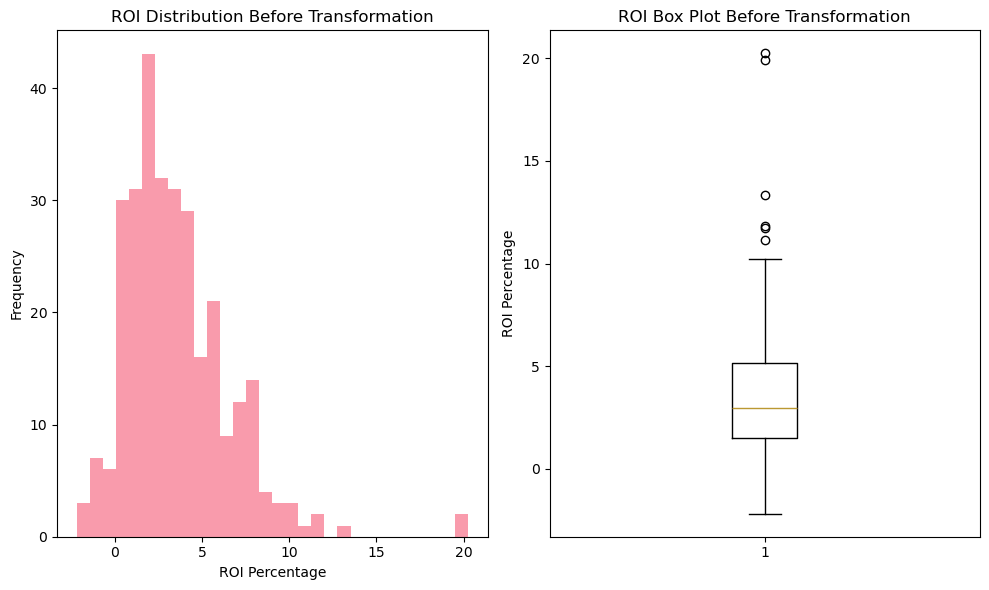

ROI Statistics Before Transformation:
Mean: 3.57%
Median: 2.99%
Std: 3.01%
Min: -2.18%
Max: 20.24%


In [12]:
# Drop rows with NaN in 'ROI_percentage' if any
print(f"Rows before cleaning: {len(df)}")
df.dropna(subset=["ROI_percentage"], inplace=True)
print(f"Rows after cleaning: {len(df)}")

# Check ROI distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df['ROI_percentage'], bins=30, alpha=0.7)
plt.title('ROI Distribution Before Transformation')
plt.xlabel('ROI Percentage')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['ROI_percentage'])
plt.title('ROI Box Plot Before Transformation')
plt.ylabel('ROI Percentage')

plt.tight_layout()
plt.show()

print(f"ROI Statistics Before Transformation:")
print(f"Mean: {df['ROI_percentage'].mean():.2f}%")
print(f"Median: {df['ROI_percentage'].median():.2f}%")
print(f"Std: {df['ROI_percentage'].std():.2f}%")
print(f"Min: {df['ROI_percentage'].min():.2f}%")
print(f"Max: {df['ROI_percentage'].max():.2f}%")


### 3.1 Apply Data Transformation to ROI (Target Variable)

We will use `PowerTransformer` to make the ROI distribution more Gaussian-like, which can help improve the performance of some machine learning models. We use `method='yeo-johnson'` as it can handle both positive and negative values.

ROI Distribution After Transformation:


C:\Users\ABCD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


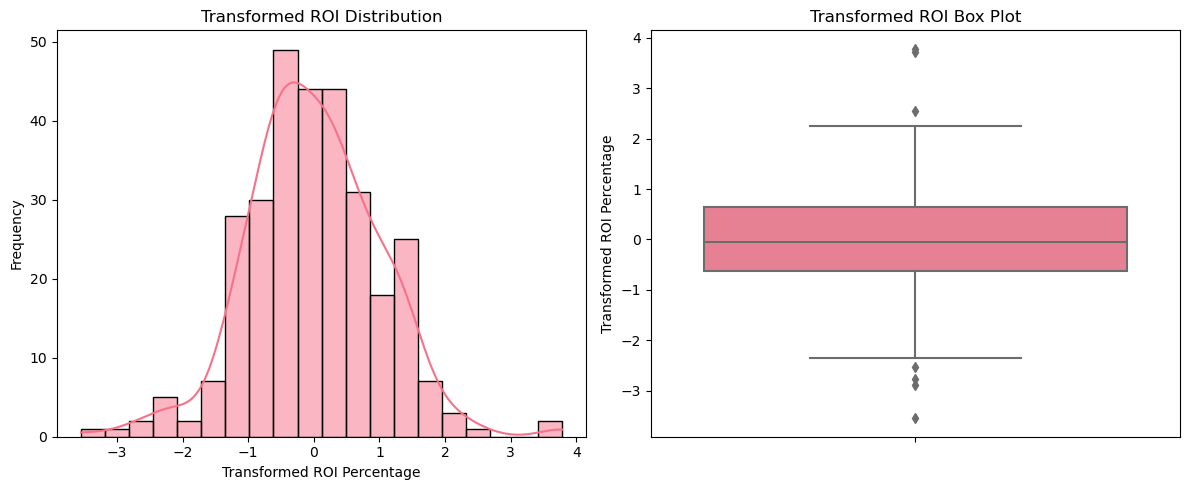

ROI Statistics After Transformation:
Mean: 0.00
Median: -0.05
Std: 1.00
Min: -3.54
Max: 3.78


In [13]:
# Initialize PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

# Reshape the ROI_percentage column for transformation
y_transformed = pt.fit_transform(df['ROI_percentage'].values.reshape(-1, 1))
df['ROI_percentage_transformed'] = y_transformed

print("ROI Distribution After Transformation:")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['ROI_percentage_transformed'], kde=True)
plt.title('Transformed ROI Distribution')
plt.xlabel('Transformed ROI Percentage')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['ROI_percentage_transformed'])
plt.title('Transformed ROI Box Plot')
plt.ylabel('Transformed ROI Percentage')

plt.tight_layout()
plt.show()

print(f"ROI Statistics After Transformation:")
print(f"Mean: {df['ROI_percentage_transformed'].mean():.2f}")
print(f"Median: {df['ROI_percentage_transformed'].median():.2f}")
print(f"Std: {df['ROI_percentage_transformed'].std():.2f}")
print(f"Min: {df['ROI_percentage_transformed'].min():.2f}")
print(f"Max: {df['ROI_percentage_transformed'].max():.2f}")

In [16]:
# Define features (X) and target (y)
# Exclude calculated ROI columns and property_id from features
numerical_features = ["stand_size_sqm", "building_size_sqm", "bedrooms", "bathrooms", "sale_price_usd"]
smart_features = ["has_solar", "has_water_recycling", "has_smart_locks", "has_smart_thermostats",
                 "has_integrated_security", "has_ev_charging"]

features = numerical_features + smart_features

# Add categorical features for one-hot encoding
categorical_features = ["location_suburb", "property_type"]

print(f"Numerical features: {numerical_features}")
print(f"Smart features: {smart_features}")
print(f"Categorical features: {categorical_features}")

Numerical features: ['stand_size_sqm', 'building_size_sqm', 'bedrooms', 'bathrooms', 'sale_price_usd']
Smart features: ['has_solar', 'has_water_recycling', 'has_smart_locks', 'has_smart_thermostats', 'has_integrated_security', 'has_ev_charging']
Categorical features: ['location_suburb', 'property_type']



### 3.2 Handle Missing Values in Features

We will impute missing values in numerical features with the median and in categorical features with a constant 'Unknown'.

In [18]:
# Impute numerical features with median
for col in numerical_features:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in numerical column {col} with median: {median_val}")

# Impute smart features (which are numerical/binary) with 0 if NaN (assuming 0 means no feature)
for col in smart_features:
    if df[col].isnull().sum() > 0:
        df[col].fillna(0, inplace=True)
        print(f"Filled missing values in smart feature column {col} with 0")

# Impute categorical features with 'Unknown'
for col in categorical_features:
    if df[col].isnull().sum() > 0:
        df[col].fillna('Unknown', inplace=True)
        print(f"Filled missing values in categorical column {col} with 'Unknown'")

print("\nMissing values per column (after imputation):")
print(df.isnull().sum())


Filled missing values in numerical column stand_size_sqm with median: 1000.0

Missing values per column (after imputation):
property_id                        0
location_suburb                    0
property_type                      0
stand_size_sqm                     0
building_size_sqm                  0
bedrooms                           0
bathrooms                          0
sale_price_usd                     0
rental_income_usd_monthly (est)    0
has_solar                          0
has_water_recycling                0
has_smart_locks                    0
has_smart_thermostats              0
has_integrated_security            0
has_ev_charging                    0
annual_rental_income_usd           0
ROI_percentage                     0
annual_property_tax_usd            0
annual_maintenance_usd             0
annual_insurance_usd               0
annual_agent_fees_usd              0
total_annual_expenses_usd          0
net_annual_income_usd              0
gross_roi_percentage     

In [20]:

# Check unique values in categorical features (after imputation)
for col in categorical_features:
    print(f"\n{col} unique values ({df[col].nunique()}):\n")
    print(df[col].value_counts().head(10))


location_suburb unique values (86):

location_suburb
Marlborough, Harare West, Harare           20
Greendale, Harare East, Harare             16
Mount Pleasant, Harare North, Harare       15
Borrowdale Brooke, Harare North, Harare    13
Chisipite, Harare North, Harare            10
Glen Lorne, Harare North, Harare           10
Waterfalls, Harare South, Harare           10
Avenues, Harare CBD, Harare                10
Arlington, Harare South, Harare            10
Borrowdale, Harare North, Harare            9
Name: count, dtype: int64

property_type unique values (3):

property_type
Townhouse         138
Luxury Home       100
Flat/Apartment     62
Name: count, dtype: int64


In [22]:
# One-hot encode categorical features
print(f"Columns before encoding: {len(df.columns)}")
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
print(f"Columns after encoding: {len(df_encoded.columns)}")

# Update features list with one-hot encoded columns
encoded_categorical_features = [col for col in df_encoded.columns if col.startswith(tuple(categorical_features))]
all_features = features + encoded_categorical_features

print(f"\nTotal features for model: {len(all_features)}")
print(f"Encoded categorical features: {len(encoded_categorical_features)}")

Columns before encoding: 25
Columns after encoding: 110

Total features for model: 98
Encoded categorical features: 87


## 4. Feature Analysis and Correlation

C:\Users\ABCD\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


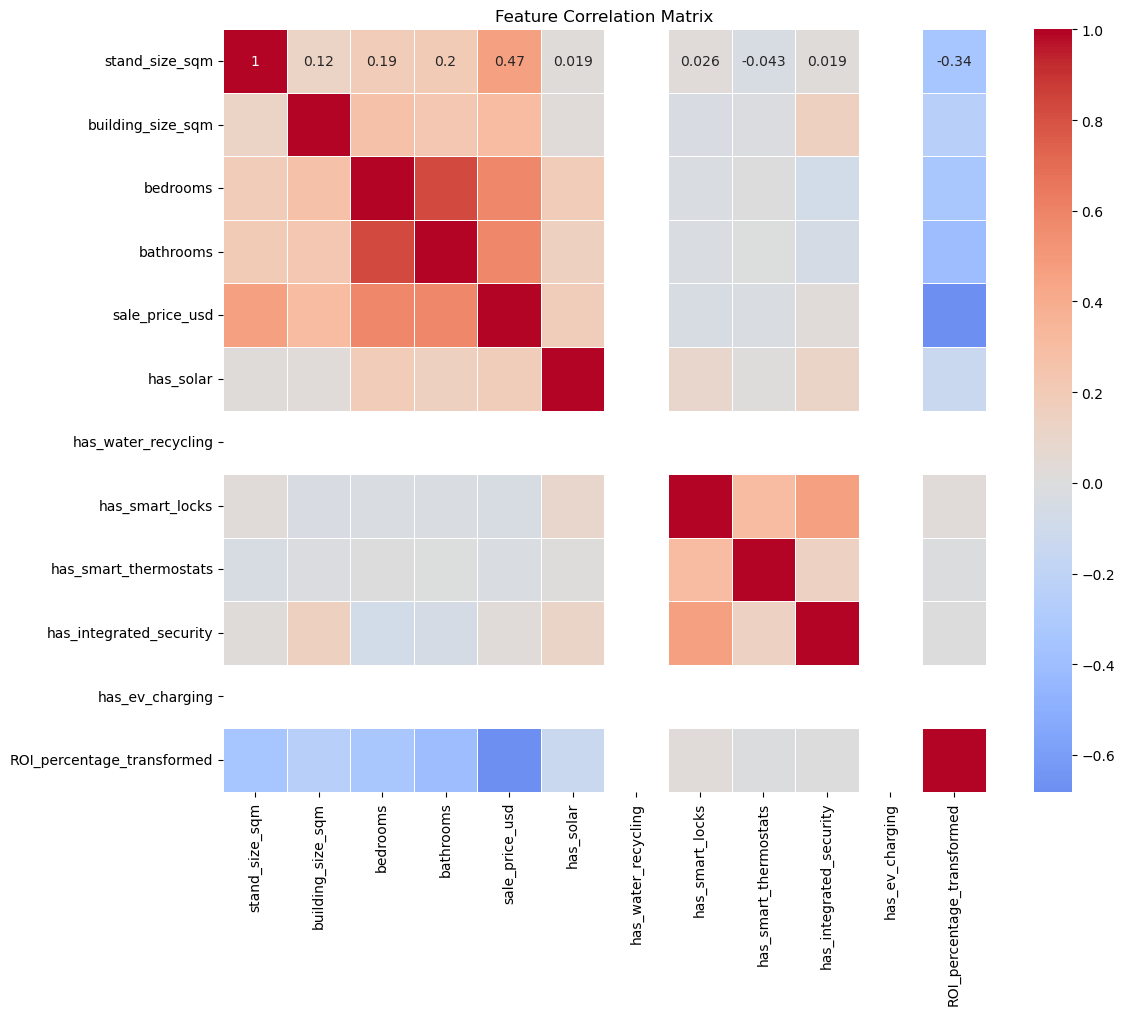


Correlation with ROI (sorted):
ROI_percentage_transformed    1.000000
has_smart_locks               0.029887
has_integrated_security       0.007527
has_smart_thermostats        -0.009547
has_solar                    -0.133291
building_size_sqm            -0.252556
bedrooms                     -0.339005
stand_size_sqm               -0.343123
bathrooms                    -0.406376
sale_price_usd               -0.681323
has_water_recycling                NaN
has_ev_charging                    NaN
Name: ROI_percentage_transformed, dtype: float64


In [24]:
# Correlation analysis for numerical features
correlation_features = numerical_features + smart_features + ['ROI_percentage_transformed']
correlation_matrix = df_encoded[correlation_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Show correlation with ROI
roi_correlation = correlation_matrix['ROI_percentage_transformed'].sort_values(ascending=False)
print("\nCorrelation with ROI (sorted):")
print(roi_correlation)

## 5. Prepare Data for Training

In [26]:
# Prepare features and target
X = df_encoded[all_features]
y = df_encoded["ROI_percentage_transformed"]

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Check for any remaining missing values
print(f"\nMissing values in features: {X.isnull().sum().sum()}")
print(f"Missing values in target: {y.isnull().sum()}")

Feature matrix shape: (300, 98)
Target vector shape: (300,)

Missing values in features: 0
Missing values in target: 0


In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training set percentage: {X_train.shape[0] / X.shape[0] * 100:.1f}%")
print(f"Test set percentage: {X_test.shape[0] / X.shape[0] * 100:.1f}%")

Training set size: 240 samples
Test set size: 60 samples
Training set percentage: 80.0%
Test set percentage: 20.0%


## 6. Train Random Forest Model

In [30]:
# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor(
    n_estimators=100,      # Number of trees
    random_state=42,       # For reproducibility
    n_jobs=-1,            # Use all available cores
    max_depth=None,       # No limit on depth
    min_samples_split=2,  # Minimum samples to split a node
    min_samples_leaf=1    # Minimum samples in a leaf
)

print("Training Random Forest model...")
model.fit(X_train, y_train)
print("Model training completed!")

Training Random Forest model...
Model training completed!


## 7. Model Evaluation

In [32]:
# Make predictions on both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("=== Model Evaluation Results ===")
print(f"\nTraining Set:")
print(f"  Mean Absolute Error (MAE): {train_mae:.2f}")
print(f"  Mean Squared Error (MSE): {train_mse:.2f}")
print(f"  R-squared (R2): {train_r2:.3f}")

print(f"\nTest Set:")
print(f"  Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"  Mean Squared Error (MSE): {test_mse:.2f}")
print(f"  R-squared (R2): {test_r2:.3f}")

print(f"\nModel Performance Summary:")
print(f"  The model explains {test_r2*100:.1f}% of the variance in ROI")
print(f"  On average, predictions are off by {test_mae:.2f} percentage points")

=== Model Evaluation Results ===

Training Set:
  Mean Absolute Error (MAE): 0.18
  Mean Squared Error (MSE): 0.06
  R-squared (R2): 0.941

Test Set:
  Mean Absolute Error (MAE): 0.45
  Mean Squared Error (MSE): 0.34
  R-squared (R2): 0.548

Model Performance Summary:
  The model explains 54.8% of the variance in ROI
  On average, predictions are off by 0.45 percentage points


## 8. Prediction vs Actual Plots

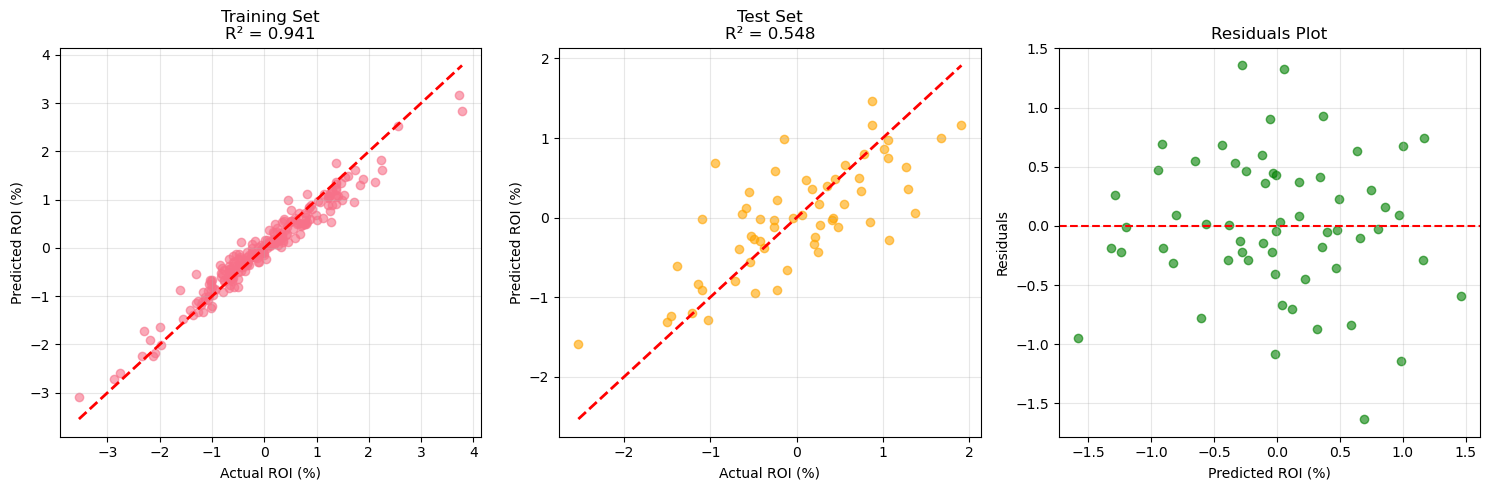

In [34]:
# Create prediction vs actual plots
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual ROI (%)')
plt.ylabel('Predicted ROI (%)')
plt.title(f'Training Set\nR² = {train_r2:.3f}')
plt.grid(True, alpha=0.3)

# Test set
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual ROI (%)')
plt.ylabel('Predicted ROI (%)')
plt.title(f'Test Set\nR² = {test_r2:.3f}')
plt.grid(True, alpha=0.3)

# Residuals plot
plt.subplot(1, 3, 3)
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted ROI (%)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Feature Importance Analysis

Top 20 Most Important Features:
                                              feature  importance
4                                      sale_price_usd    0.608664
2                                            bedrooms    0.072240
0                                      stand_size_sqm    0.051345
1                                   building_size_sqm    0.049048
3                                           bathrooms    0.014539
53     location_suburb_Greendale, Harare East, Harare    0.013489
51    location_suburb_Greencroft, Harare West, Harare    0.012570
17                location_suburb_Avenues, Harare CBD    0.012259
46   location_suburb_Glen Lorne, Harare North, Harare    0.011690
18        location_suburb_Avenues, Harare CBD, Harare    0.011556
15    location_suburb_Arlington, Harare South, Harare    0.011240
9                             has_integrated_security    0.009677
44      location_suburb_Glaudina, Harare West, Harare    0.009512
5                                           

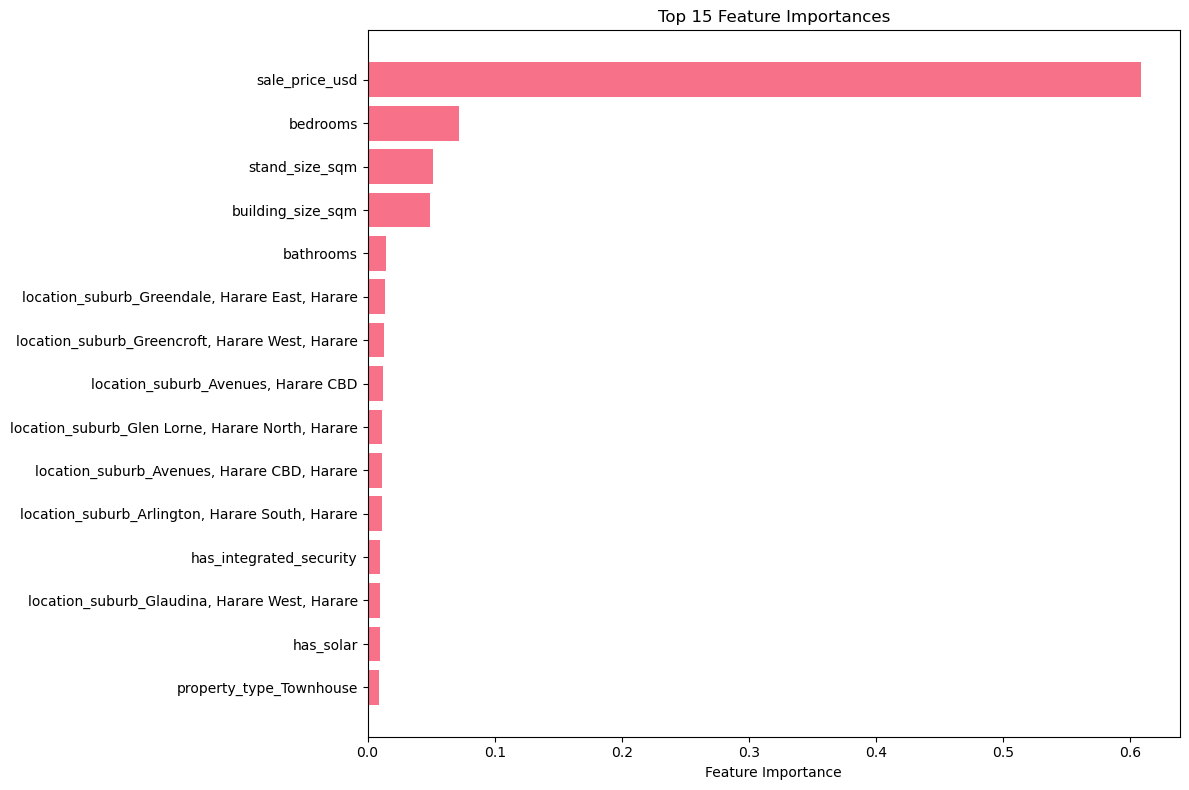

In [36]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': all_features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

# Display top 20 most important features
print("Top 20 Most Important Features:")
print(feature_importance.head(20))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 10. Model Comparison with Different Parameters

Performance with different numbers of estimators:
   n_estimators       MAE        R2
0            50  0.457299  0.538593
1           100  0.453614  0.548227
2           200  0.450256  0.564240
3           300  0.449828  0.562229


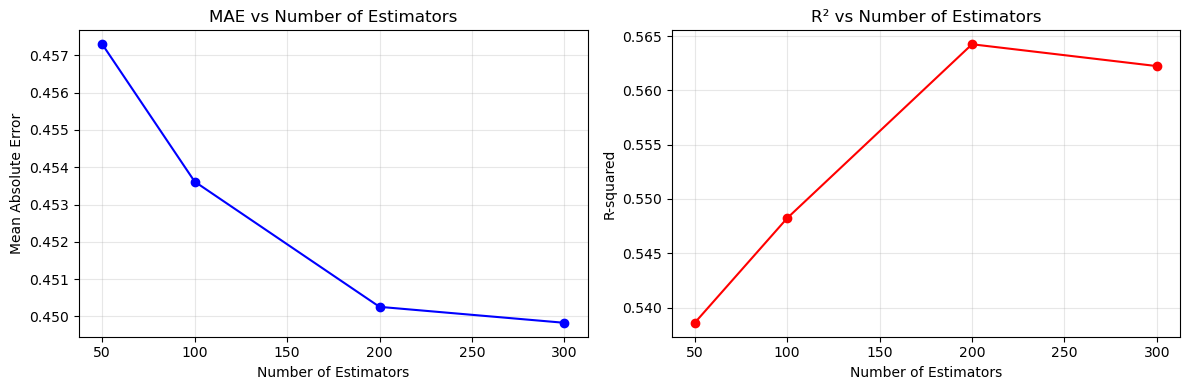

In [38]:
# Test different numbers of estimators
n_estimators_list = [50, 100, 200, 300]
results = []

for n_est in n_estimators_list:
    rf_temp = RandomForestRegressor(n_estimators=n_est, random_state=42, n_jobs=-1)
    rf_temp.fit(X_train, y_train)
    y_pred_temp = rf_temp.predict(X_test)
    
    mae_temp = mean_absolute_error(y_test, y_pred_temp)
    r2_temp = r2_score(y_test, y_pred_temp)
    
    results.append({
        'n_estimators': n_est,
        'MAE': mae_temp,
        'R2': r2_temp
    })

results_df = pd.DataFrame(results)
print("Performance with different numbers of estimators:")
print(results_df)

# Plot results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(results_df['n_estimators'], results_df['MAE'], 'bo-')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Absolute Error')
plt.title('MAE vs Number of Estimators')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(results_df['n_estimators'], results_df['R2'], 'ro-')
plt.xlabel('Number of Estimators')
plt.ylabel('R-squared')
plt.title('R² vs Number of Estimators')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 11. Save the Trained Model

In [40]:
# Save the trained model
model_filename = "roi_prediction_model.pkl"
joblib.dump(model, model_filename)
print(f"Trained model saved as {model_filename}")

# Save the PowerTransformer for inverse transformation during prediction
transformer_filename = "roi_transformer.pkl"
joblib.dump(pt, transformer_filename)
print(f"PowerTransformer saved as {transformer_filename}")

# Also save feature names for future reference
feature_names_filename = "model_features.pkl"
joblib.dump(all_features, feature_names_filename)
print(f"Feature names saved as {feature_names_filename}")

print(f"\nModel training completed successfully!")
print(f"Final model performance:")
print(f"  - Test MAE: {test_mae:.2f}")
print(f"  - Test R²: {test_r2:.3f}")
print(f"  - Number of features: {len(all_features)}")
print(f"  - Training samples: {len(X_train)}")
print(f"  - Test samples: {len(X_test)}")

Trained model saved as roi_prediction_model.pkl
PowerTransformer saved as roi_transformer.pkl
Feature names saved as model_features.pkl

Model training completed successfully!
Final model performance:
  - Test MAE: 0.45
  - Test R²: 0.548
  - Number of features: 98
  - Training samples: 240
  - Test samples: 60


## 12. Test Model Loading and Prediction

In [42]:
# Test loading the saved model
loaded_model = joblib.load(model_filename)
loaded_features = joblib.load(feature_names_filename)

print(f"Model loaded successfully!")
print(f"Loaded features count: {len(loaded_features)}")

# Test prediction with the loaded model
test_prediction = loaded_model.predict(X_test[:5])
print(f"\nTest predictions on first 5 test samples:")
for i in range(5):
    print(f"  Sample {i+1}: Actual = {y_test.iloc[i]:.2f}%, Predicted = {test_prediction[i]:.2f}%")

Model loaded successfully!
Loaded features count: 98

Test predictions on first 5 test samples:
  Sample 1: Actual = -0.26%, Predicted = -0.11%
  Sample 2: Actual = -0.42%, Predicted = -0.29%
  Sample 3: Actual = 0.87%, Predicted = 1.16%
  Sample 4: Actual = 0.85%, Predicted = -0.05%
  Sample 5: Actual = 0.42%, Predicted = -0.00%


In [44]:
import os, joblib
print("cwd:", os.getcwd())

cwd: C:\Users\ABCD\Desktop\PROJECT WESTVAULT 2\models


In [46]:
model_path = r"C:\Users\ABCD\Desktop\PROJECT WESTVAULT 2\models\roi_prediction_model.pkl"
model = joblib.load(model_path)
print("Loaded OK:", type(model))

Loaded OK: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
